<a href="https://colab.research.google.com/github/Madhuram2901/GDGC_MACHINE_LEARNING_MADHURAM/blob/main/FoodBorneDiseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Dataset**

In [4]:
data_path = '/content/outbreaks.csv'

# **Importing Libraries**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv(data_path)
data.head()

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0


# **Q1. Are foodborne disease outbreaks increasing or decreasing?**

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
outbreaks_year = data.groupby('Year').size()
outbreaks_year

,0
Year,
1998,1317
1999,1337
2000,1405
2001,1248
2002,1320
2003,1089
2004,1328
2005,959
2006,1255


## **Linear Regression Model**

In [9]:
X = outbreaks_year.index.values.reshape(-1, 1)
y = outbreaks_year.values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [11]:
LinearModel = LinearRegression()
LinearModel.fit(X_train, y_train)

LinearRegression()

In [12]:
ytrain_predict = LinearModel.predict(X_train)
ytest_predict = LinearModel.predict(X_test)

In [13]:
mse_train = mean_squared_error(y_train, ytrain_predict)
mse_train

15151.02128762554

In [14]:
mse_test = mean_squared_error(y_test, ytest_predict)
mse_test

12409.230538953185

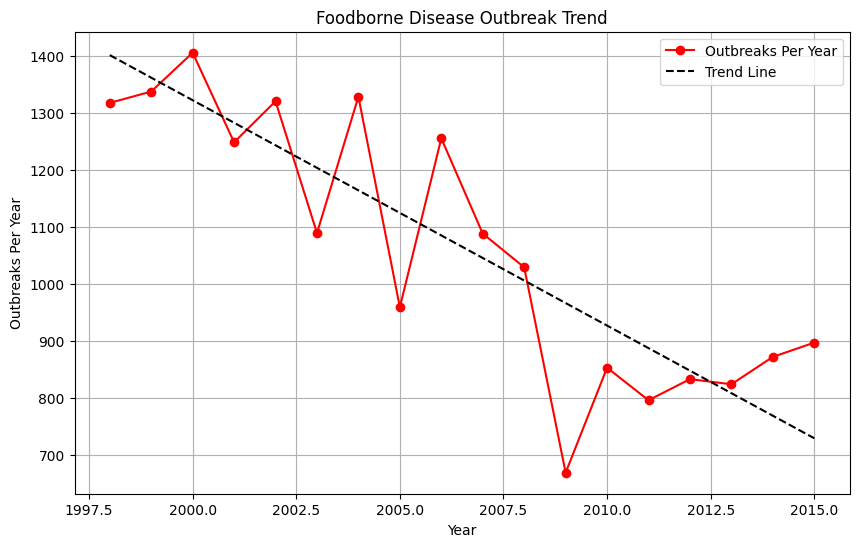

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(outbreaks_year.index, outbreaks_year.values, label='Outbreaks Per Year', marker='o', color = 'red')
plt.plot(outbreaks_year.index, LinearModel.predict(X) , label='Trend Line', linestyle='--', color='black')
plt.title('Foodborne Disease Outbreak Trend')
plt.xlabel('Year')
plt.ylabel('Outbreaks Per Year')
plt.legend()
plt.grid(True)
plt.show()

## **Answer-1: Hence from the graph we can see that the trend of foodborne disease outbreaks is Decreasing**

# **Q2. Which contaminant has been responsible for the most illnesses,hospitalizations, and deaths?**

In [16]:
data.head()

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0


## **Random Forest Classifier**

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [18]:
RFModel = RandomForestClassifier(n_estimators=100, random_state=42)
RFModel.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
ytrain_predictrf = RFModel.predict(X_train)
ytest_predictrf = RFModel.predict(X_test)

In [20]:
ytrain_predictrf

array([1248,  796,  872,  824,  669, 1405, 1088,  897, 1320,  853,  959,
       1029,  833, 1328])

In [21]:
ytest_predictrf

array([1405, 1405,  959, 1320])

In [22]:
max_ill_row = data.loc[data['Illnesses'].idxmax()]
species_max_ill  = max_ill_row['Species']
species_max_ill

'Salmonella enterica'

In [23]:
max_hosp_row = data.loc[data['Hospitalizations'].idxmax()]
species_max_hosp  = max_hosp_row['Species']
species_max_hosp

'Salmonella enterica'

In [24]:
max_fatal_row = data.loc[data['Fatalities'].idxmax()]
species_max_fatal  = max_fatal_row['Species']
species_max_fatal

'Listeria monocytogenes'

In [25]:
#For finding the species which did most illness in sum till now.
group_ill = data.groupby('Species')['Illnesses'].sum()
max_ill = group_ill.idxmax()
max_ill

'Norovirus genogroup I'

In [26]:
#For finding the species which did most hospitalizations in sum till now.
group_hospital = data.groupby('Species')['Hospitalizations'].sum()
max_hosp = group_hospital.idxmax()
max_hosp

'Salmonella enterica'

In [27]:
#For finding the species which did most fatalities in sum till now.
group_fatal = data.groupby('Species')['Fatalities'].sum()
max_fatal = group_fatal.idxmax()
max_fatal

'Listeria monocytogenes'

## **Answer-2: Desired Result is:**
## **For single event:**
## **The species which did the most illnesses = Salmonella enterica**

##**The species which did the most hospitalizations = Salmonella enterica**

## **The species which did the most fatalities = Listeria monocytogenes**

## **For Record till now:**
## **The species which did the most illnesses = Norovirus genogroup I**

##**The species which did the most hospitalizations = Salmonella enterica**

## **The species which did the most fatalities = Listeria monocytogenes**

# **Q3. What location for food preparation poses the greatest risk of foodborne illness?**

In [28]:
group_sum = data.groupby('Location')['Illnesses'].sum()
group_sum

,Illnesses
Location,
Banquet Facility,12272
Banquet Facility; Catering Service,529
Banquet Facility; Catering Service; Grocery Store,14
Banquet Facility; Catering Service; Religious Facility,19
Banquet Facility; Grocery Store,29
...,...
School/College/University; Camp,77
School/College/University; Prison/Jail,67
School/College/University; Religious Facility,28


In [29]:
max_risk_loc = group_sum.idxmax()
max_risk_loc

'Restaurant'

## **Answer-3: Location for food preparation poses the greatest risk of foodborne illness at : Restaurant**